## Normalizing Flows for GlueX Simulation

![Example Image](https://halldweb.jlab.org/wiki/images/2/25/BCAL.png)




We are going to look at two different neutral particles in the Barrel Calorimeter (BCAL), photons ($\gamma$) and neutrons ($n$) and use normalizing flows to generate them. We will make assumptions that both classes are well represented by the simulation.


### Load the data and take a look


In [2]:

# Lets load the data. We store in simple csv files.
import pandas as pd

neutrons = pd.read_csv(r"D:\BCAL\Neutrons.csv",sep=',',index_col=None)
photons = pd.read_csv(r"D:\BCAL\Photons.csv",sep=',',index_col=None)

print(neutrons.columns)
print(photons.columns)

Index(['recon_BCAL_z_entry', 'recon_BCAL_E', 'recon_BCAL_r',
       'recon_BCAL_Layer1_E', 'recon_BCAL_Layer2_E', 'recon_BCAL_Layer3_E',
       'recon_BCAL_Layer4_E', 'recon_BCAL_Layer4bySumLayers_E',
       'recon_BCAL_Layer3bySumLayers_E', 'recon_BCAL_Layer2bySumLayers_E',
       'recon_BCAL_Layer1bySumLayers_E', 'recon_BCAL_ZWidth',
       'recon_BCAL_RWidth', 'recon_BCAL_TWidth', 'recon_BCAL_PhiWidth',
       'recon_BCAL_ThetaWidth'],
      dtype='object')
Index(['recon_BCAL_z_entry', 'recon_BCAL_E', 'recon_BCAL_r',
       'recon_BCAL_Layer1_E', 'recon_BCAL_Layer2_E', 'recon_BCAL_Layer3_E',
       'recon_BCAL_Layer4_E', 'recon_BCAL_Layer4bySumLayers_E',
       'recon_BCAL_Layer3bySumLayers_E', 'recon_BCAL_Layer2bySumLayers_E',
       'recon_BCAL_Layer1bySumLayers_E', 'recon_BCAL_ZWidth',
       'recon_BCAL_RWidth', 'recon_BCAL_TWidth', 'recon_BCAL_PhiWidth',
       'recon_BCAL_ThetaWidth'],
      dtype='object')


### We want to learn the generate the features of the BCAL as a function of the kinematics

Lets look at how the features are distributed for both photons and neutrons, as a function of the two kinematic variables.

$\boldsymbol{z}$ - recon_BCAL_z_entry

This is the z position (along the beamline) that a particle interacts with the innermost layer of the BCAL. The shower profile will change with a function of z. Does this make sense to you?

$\boldsymbol{E}$ - recon_BCAL_E

The total reconstructed (by the detector) energy of a particle. The shower profile will change as a function of energy? Does this make sense to you?

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def make_plots(dataset,particle):
    columns = ['recon_BCAL_r', 'recon_BCAL_Layer1_E', 'recon_BCAL_Layer2_E',
           'recon_BCAL_Layer3_E', 'recon_BCAL_Layer4_E',
           'recon_BCAL_Layer4bySumLayers_E', 'recon_BCAL_Layer3bySumLayers_E',
           'recon_BCAL_Layer2bySumLayers_E', 'recon_BCAL_Layer1bySumLayers_E',
           'recon_BCAL_ZWidth', 'recon_BCAL_RWidth', 'recon_BCAL_TWidth',
           'recon_BCAL_PhiWidth', 'recon_BCAL_ThetaWidth']
    fig, axs = plt.subplots(2,7, figsize=(30, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.4, wspace=.3)
    axs = axs.ravel()


    labels = ['Radius',
     r'$E (1^{st} \, Layer)$',
     r'$E (2^{nd} \, Layer)$',
     r'$E (3^{rd} \, Layer)$',
     r'$E (4^{th} \, Layer)$',
     r'$\frac{E (4^{th} \, Layer)}{\sum E}$',
     r'$\frac{E (3^{rd} \, Layer)}{\sum E}$',
     r'$\frac{E (2^{nd} \, Layer)}{\sum E}$',
     r'$\frac{E (1^{st} \, Layer)}{\sum E}$',
     r'$Z \, Width$',
     r'$R \, Width$',
     r'$T \, Width$',
     r'$\phi \,  Width$',
     r'$\theta  \, Width$']

    i = 0
    print(particle)
    for column in columns:
        y = dataset[column]
        x = dataset['recon_BCAL_E']
        axs[i].hist2d(y,x,bins=55,density=True,alpha=1.0,norm=mpl.colors.LogNorm())
        plt.setp(axs[i].get_xticklabels(), fontsize=14)
        plt.setp(axs[i].get_yticklabels(), fontsize=15) 
        ticks = np.linspace(min(y),max(y),4)
        ticks = np.around(ticks,decimals=2)
        axs[i].set_xticks(ticks=ticks)

        s = labels[i]

        axs[i].set_xlabel(s,fontsize=25,labelpad=5)
        if ((i == 0) or (i == 7)):
            axs[i].set_ylabel('Energy',fontsize=25,labelpad=9)
        i+=1

    N = len(columns)
    for ax in axs.flat[N:]:
        ax.remove()

    plt.show()
    plt.close()

    fig, axs = plt.subplots(2,7, figsize=(30, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.4, wspace=.3)
    axs = axs.ravel()

    i = 0
    for column in columns:
        y = dataset[column]
        x = dataset['recon_BCAL_z_entry']
        axs[i].hist2d(y,x,bins=55,density=True,alpha=1.0,norm=mpl.colors.LogNorm())
        plt.setp(axs[i].get_xticklabels(), fontsize=14)
        plt.setp(axs[i].get_yticklabels(), fontsize=15)  #to Set Matplotlib Tick Labels Font Size.
        ticks = np.linspace(min(y),max(y),4)
        ticks = np.around(ticks,decimals=2)
        axs[i].set_xticks(ticks=ticks)
        s = labels[i]

        axs[i].set_xlabel(s,fontsize=25,labelpad=5)
        if ((i == 0) or (i == 7)):
            axs[i].set_ylabel('Z Position',fontsize=25,labelpad=9)
        i+=1

    N = len(columns)
    for ax in axs.flat[N:]:
        ax.remove()

    plt.show()
    plt.close()

Photons


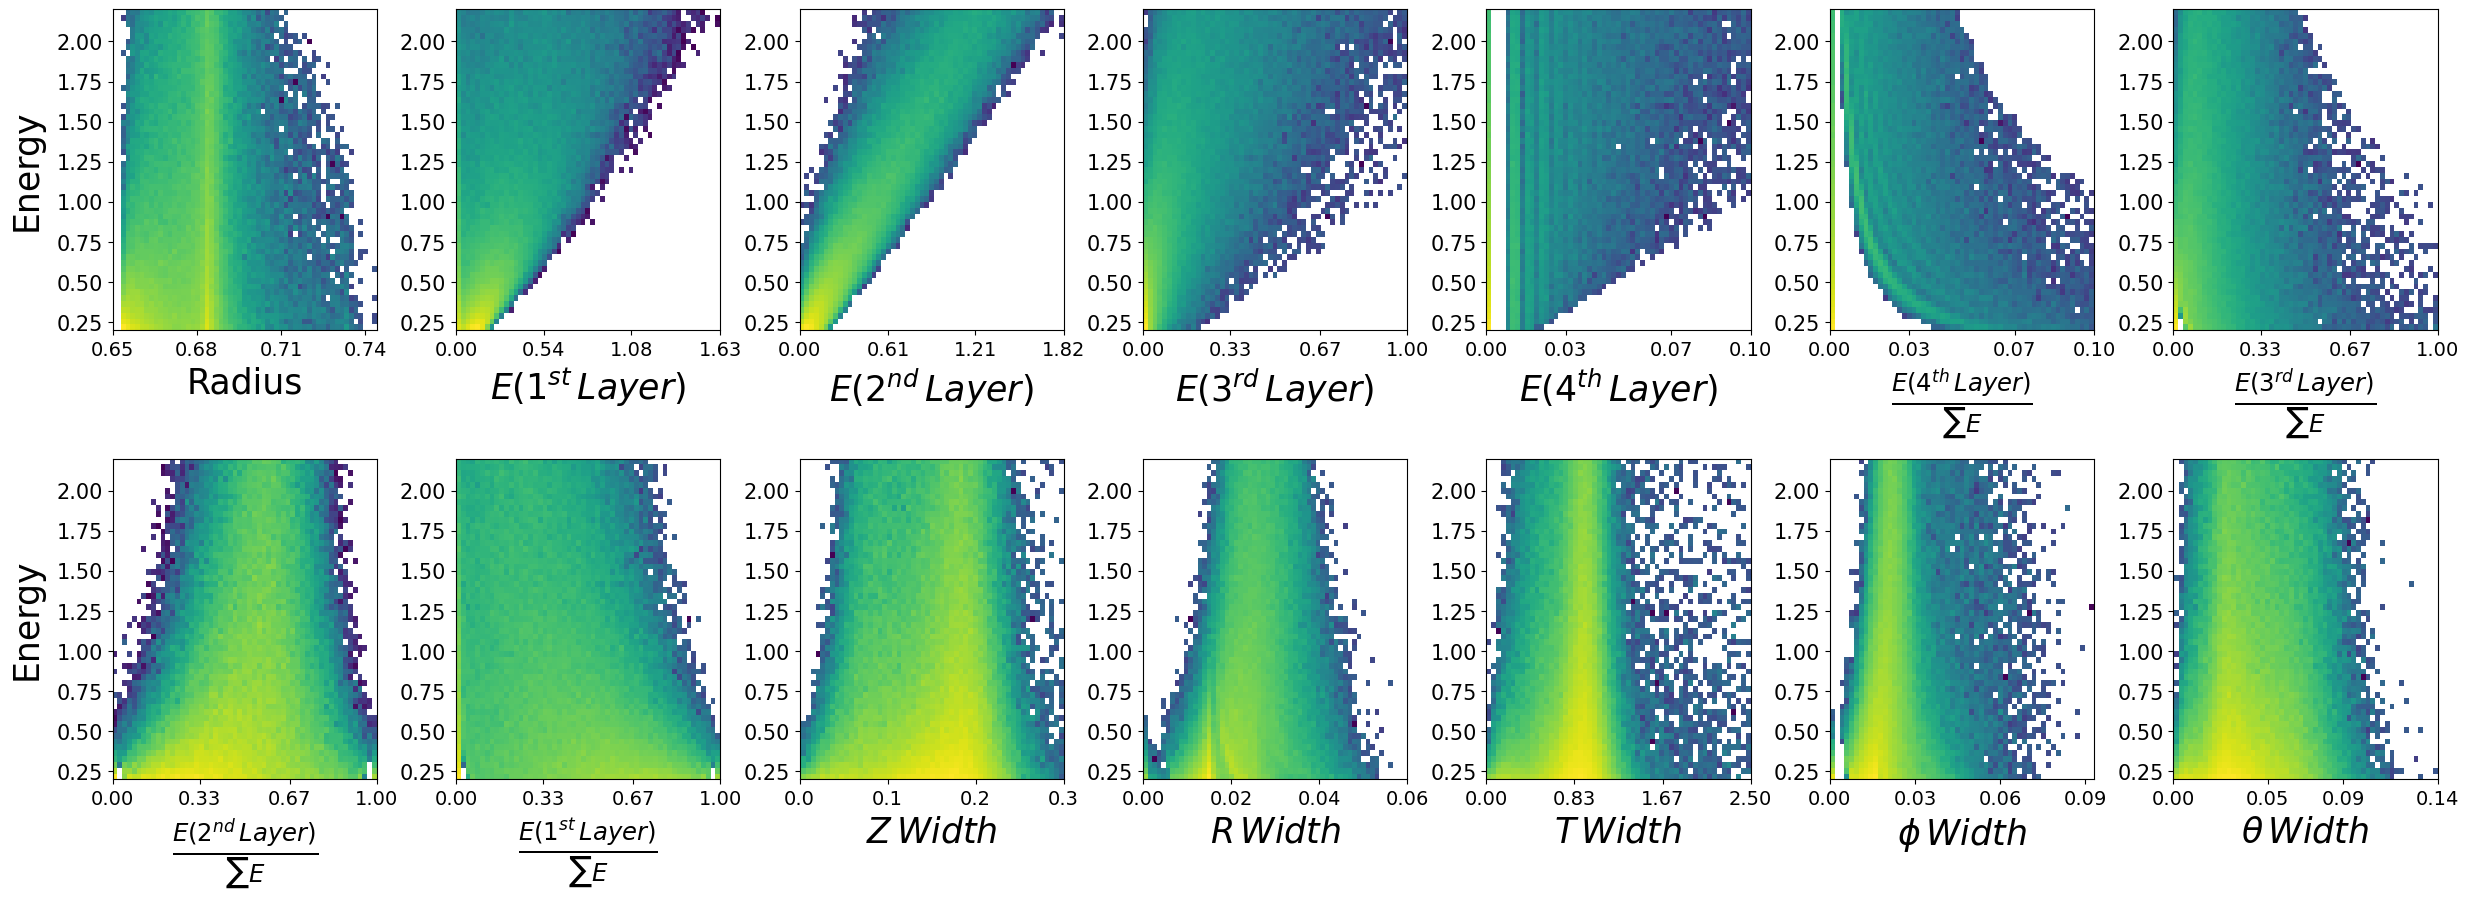

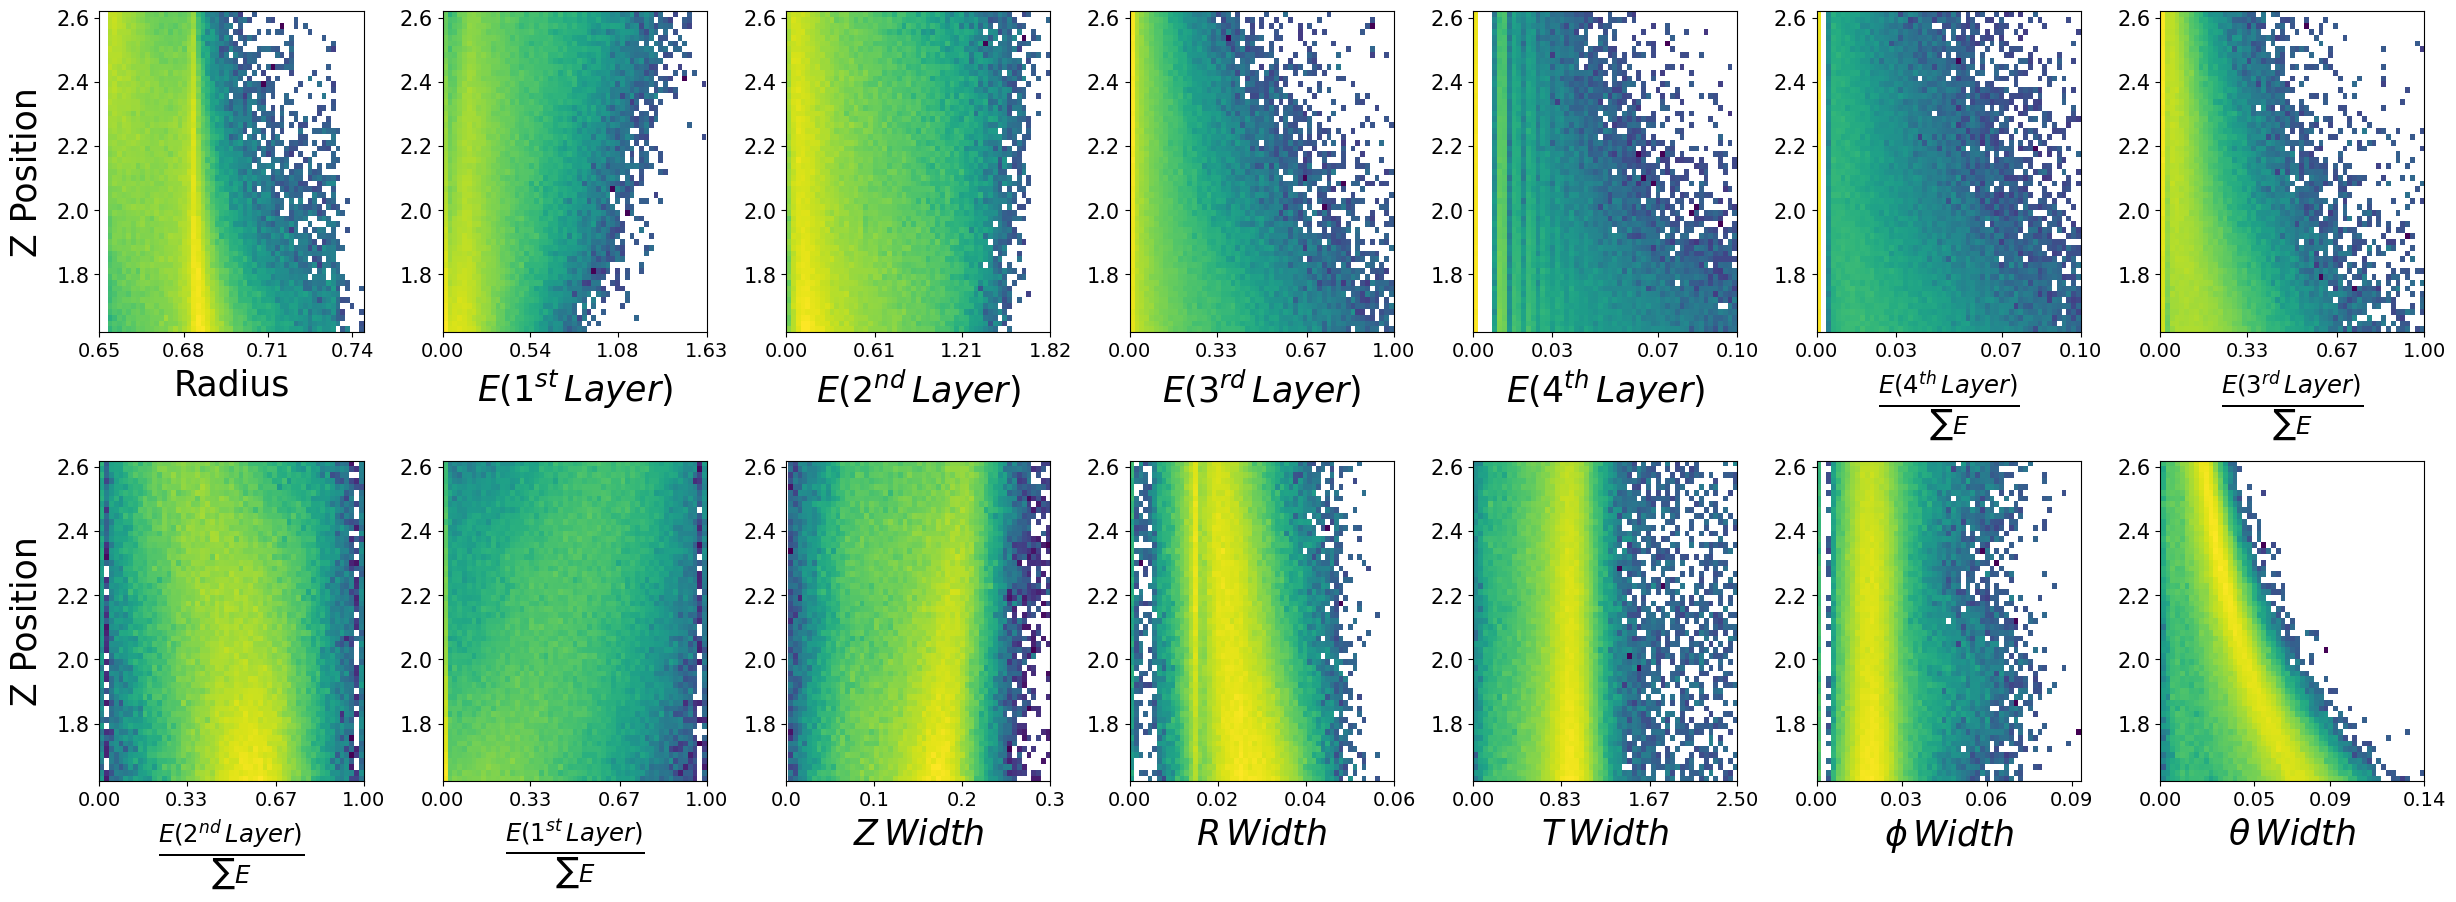

In [100]:
make_plots(photons,"Photons")

Neutrons


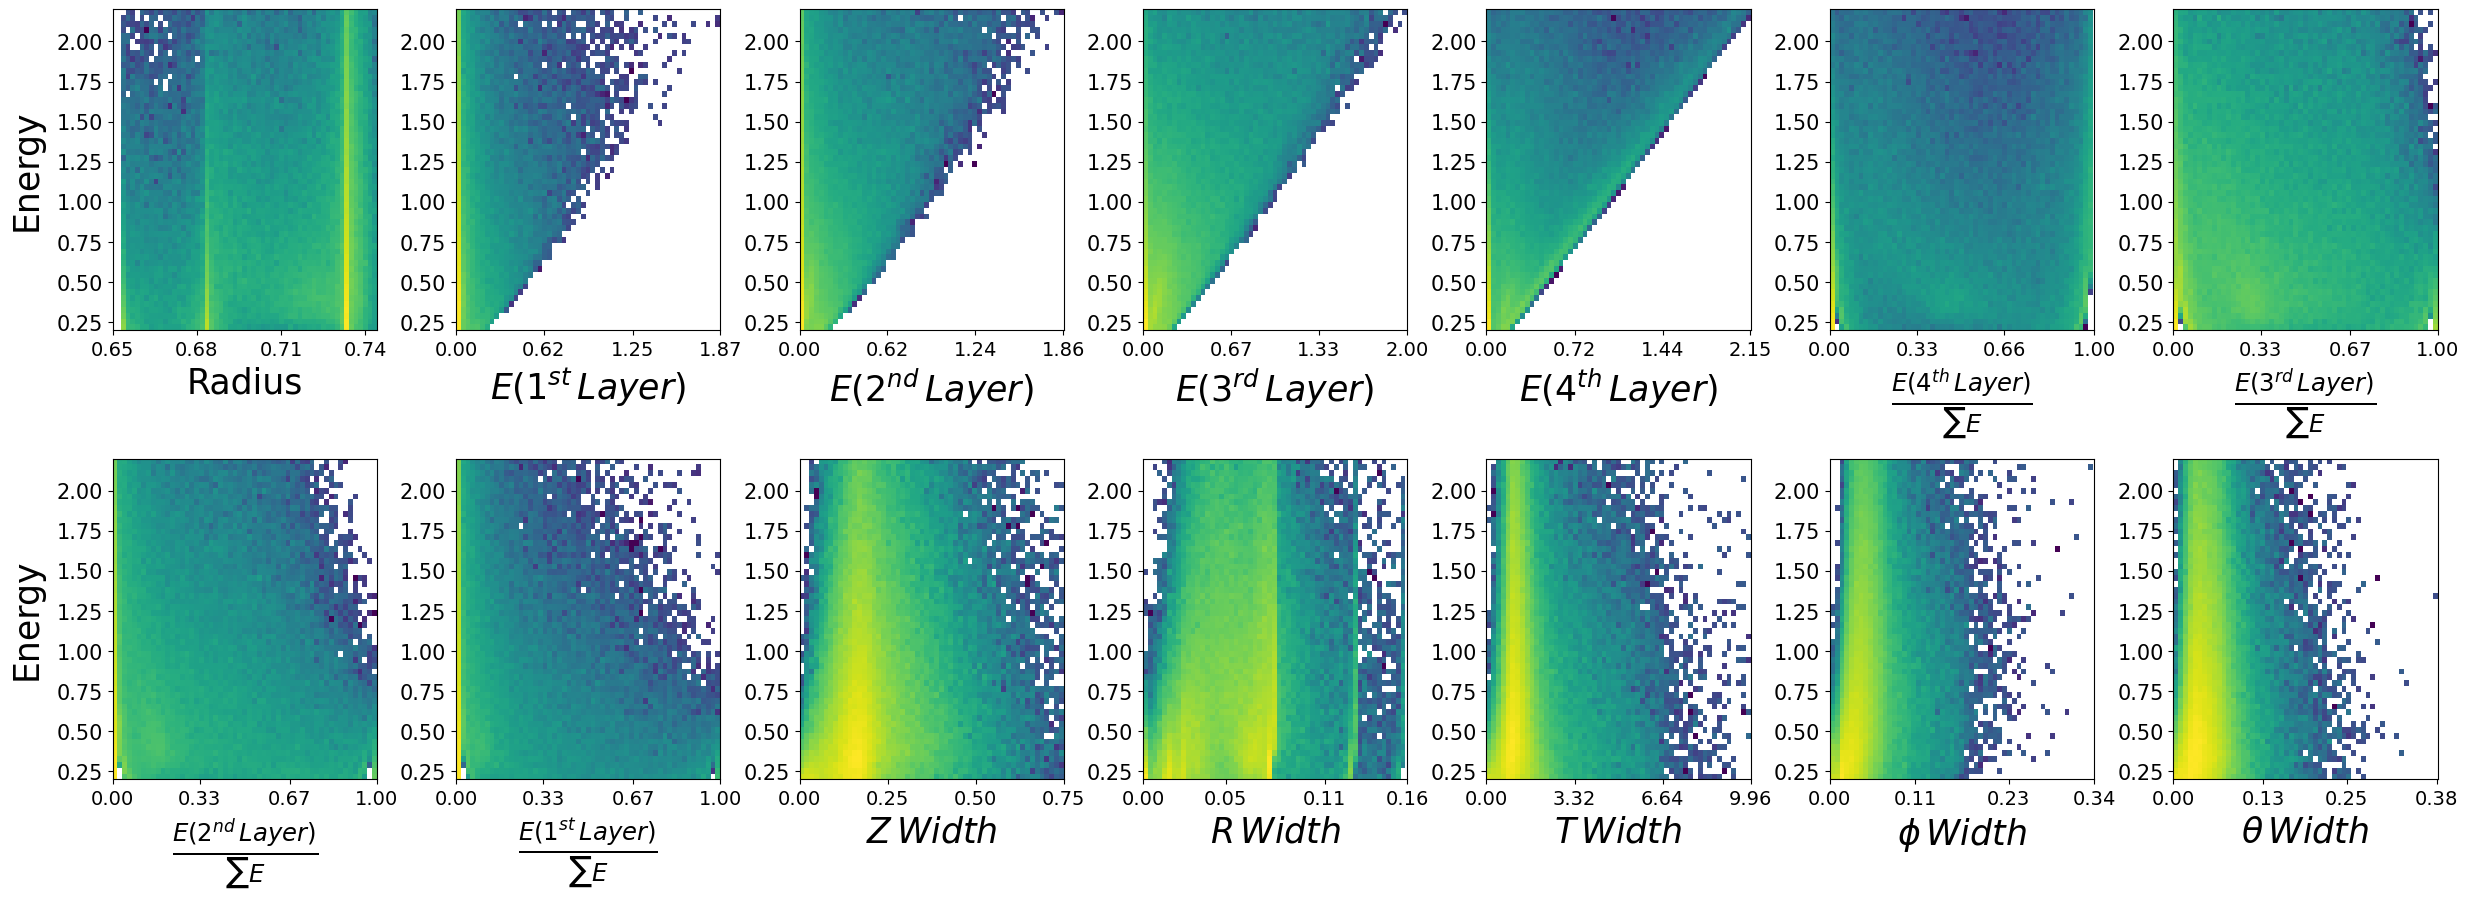

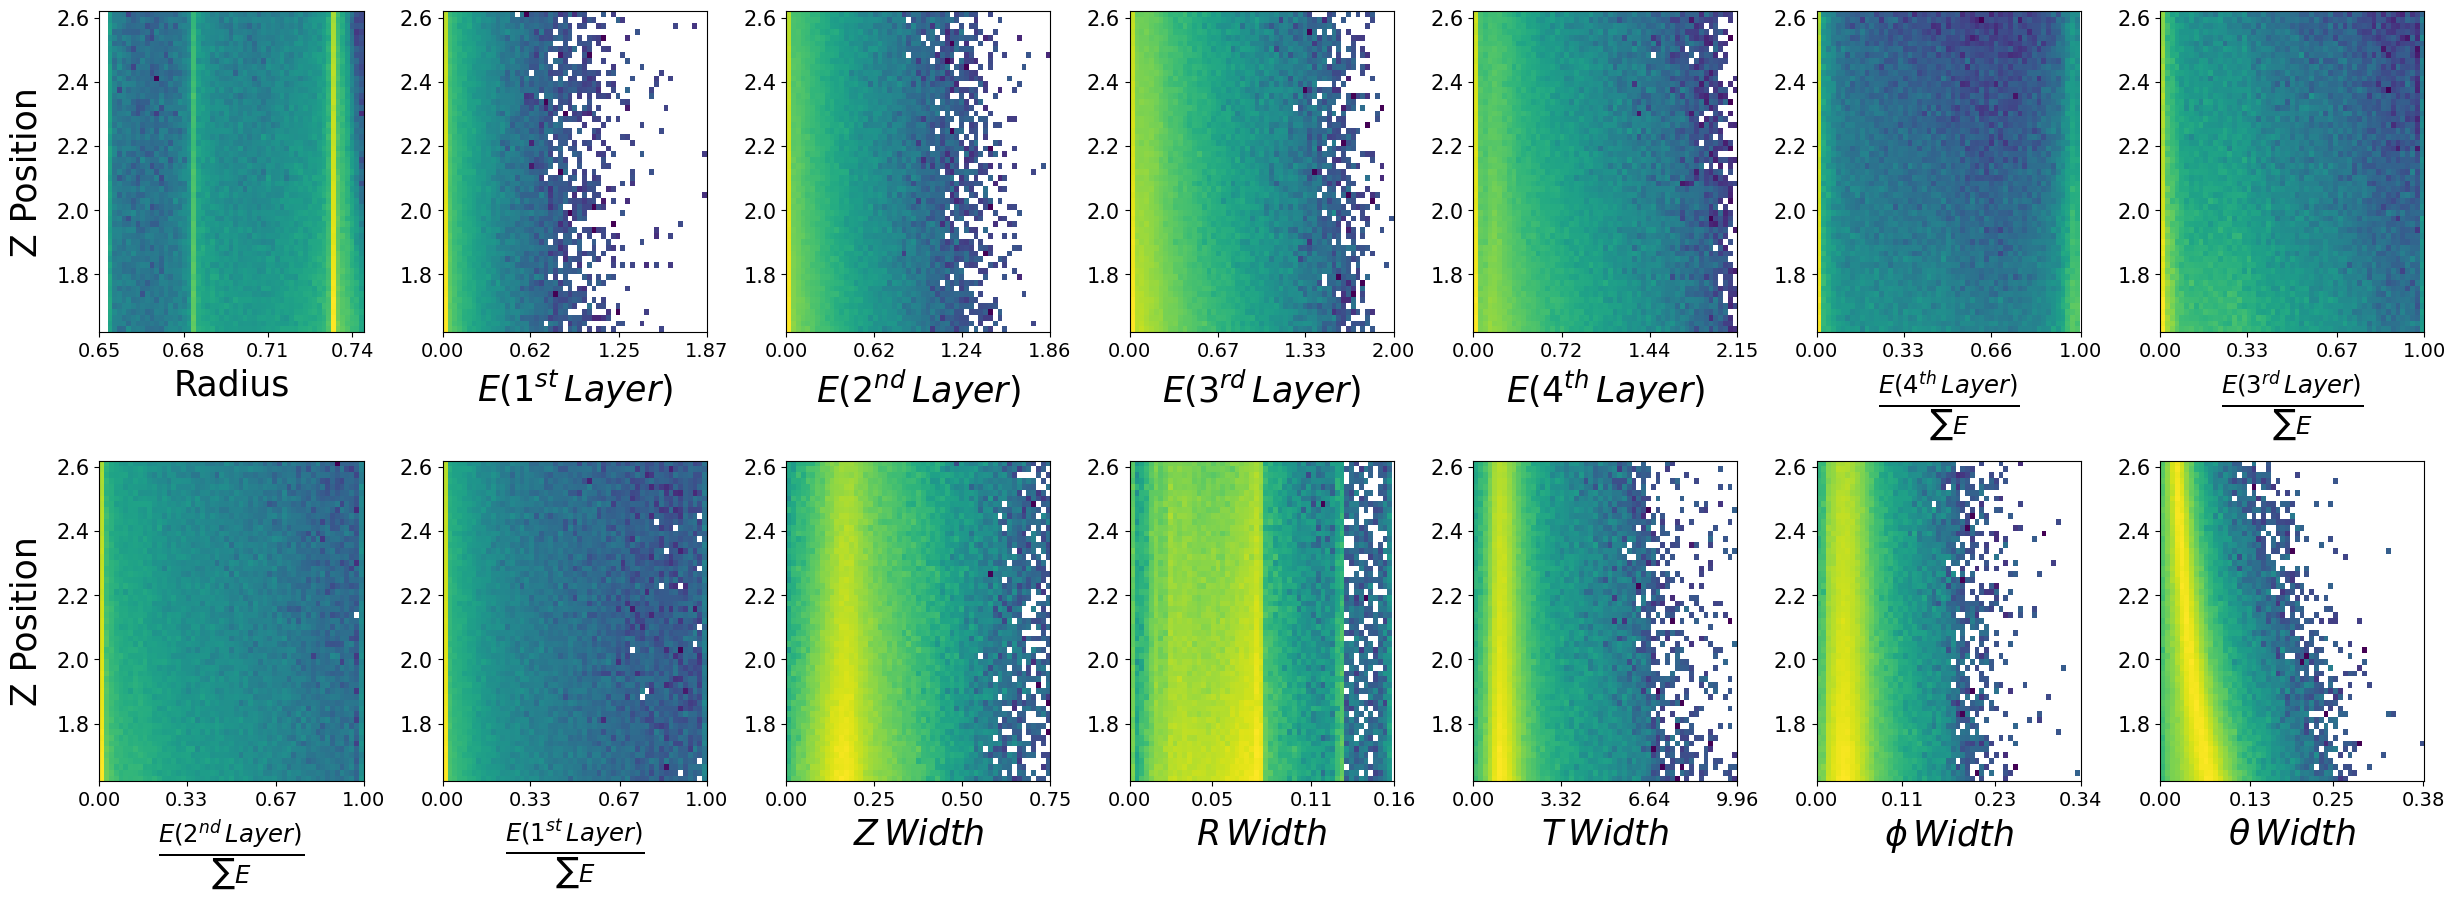

In [101]:
make_plots(neutrons,"Neutrons")

### Data visualization is important

We have expected distributions of the features as a function of the two kinematic parameters. This will be useful later for comparisons. We can generate artificial data with out network and check if the relationships are retained.


Now lets work on making methods to load the data into our models using standard pytorch functions.

I am going to introduce you to two different methods.

1. Custom Datasets
2. Dataloaders

Note that we don't really need a custom dataset here and a simple TensorDataset() would do just fine, but lets use one anyways to get you more familiar with different pytorch methods.

Lets setup dictionaries of the normalization statistics of the two datasets, i.e., maximum and minimums. We could just use an sklearn method of MinMaxScaler() here, but lets consider a case when this is not feasible. For example, if we cannot fit all data into RAM and we need to load batches from file (not the case here, but you could face this).

One could precompute the statistics and load individual files to create the batches, scaling in the way we will define below.

In [5]:
fields = photons.columns

stats = {}
for field in fields:
    p_max = photons[field].max()
    n_max = neutrons[field].max()
    p_min = photons[field].min()
    n_min = neutrons[field].min()
    
    stats[f"{field}_max"] = max(p_max,n_max)
    stats[f"{field}_min"] = min(p_min,n_min)

In [6]:
stats

{'recon_BCAL_z_entry_max': 2.6199997,
 'recon_BCAL_z_entry_min': 1.6200029,
 'recon_BCAL_E_max': 2.1999831,
 'recon_BCAL_E_min': 0.2000011,
 'recon_BCAL_r_max': 0.74404915,
 'recon_BCAL_r_min': 0.65299995,
 'recon_BCAL_Layer1_E_max': 1.8684639,
 'recon_BCAL_Layer1_E_min': 0.0,
 'recon_BCAL_Layer2_E_max': 1.8641225,
 'recon_BCAL_Layer2_E_min': 0.0,
 'recon_BCAL_Layer3_E_max': 2.002063,
 'recon_BCAL_Layer3_E_min': 0.0,
 'recon_BCAL_Layer4_E_max': 2.1544363,
 'recon_BCAL_Layer4_E_min': 0.0,
 'recon_BCAL_Layer4bySumLayers_E_max': 0.99562687,
 'recon_BCAL_Layer4bySumLayers_E_min': 0.0,
 'recon_BCAL_Layer3bySumLayers_E_max': 1.0,
 'recon_BCAL_Layer3bySumLayers_E_min': 0.0,
 'recon_BCAL_Layer2bySumLayers_E_max': 1.0,
 'recon_BCAL_Layer2bySumLayers_E_min': 0.0,
 'recon_BCAL_Layer1bySumLayers_E_max': 1.0,
 'recon_BCAL_Layer1bySumLayers_E_min': 0.0,
 'recon_BCAL_ZWidth_max': 0.7497995999999999,
 'recon_BCAL_ZWidth_min': 0.00046754237,
 'recon_BCAL_RWidth_max': 0.158894415,
 'recon_BCAL_RWidth_mi

In [26]:
import numpy as np
import pandas as pd
import random
from torch.utils.data import Dataset
import torch

class BCALDataset(Dataset):
    def __init__(self,dataset,mode="Single",stats=None):
        if mode is None:
            print("Please select one of the following modes:")
            print("1. Single")
            print("2. Combined")
            exit()
        self.stats = stats
        
        if self.stats is not None:
            self.max_values = np.array([self.stats[key] for key in list(self.stats.keys())[4:] if key.endswith('_max')])
            self.min_values = np.array([self.stats[key] for key in list(self.stats.keys())[4:] if key.endswith('_min')])
            self.max_conds = np.array([self.stats[key] for key in list(self.stats.keys())[:4] if key.endswith('_max')])
            self.min_conds = np.array([self.stats[key] for key in list(self.stats.keys())[:4] if key.endswith('_min')])
            
        else:
            print("Applying no scaling to your data.")
            
        if mode == "Single":
            self.data = dataset

        elif mode == "Combined":
            print('You need to write some code!')
            exit()
            # I leave this up to you.
            # Is it possible to combine the two particles under one model?
            # What else would you need to add?
            # Hint: Perhaps another conditional parameter corresponding to the PID (label)?
        else:
            print("Error in dataset creation. Exiting")
            exit()

    def __len__(self):
        return len(self.data)

    def scale_features(self,data):
        return 2.0 * (data - self.min_values) / (self.max_values - self.min_values) - 1.0 # (-1,1) 
    
    def scale_conditions(self,conditions):
        return (conditions - self.min_conds) / (self.max_conds - self.min_conds) # (0,1)

    def __getitem__(self, idx):
        # Get the sample
        data = self.data[idx]
        conditions = data[:2]
        features = data[2:]
        unscaled_conditions = conditions.copy()
        
        if self.stats is not None:
            conditions = self.scale_conditions(conditions)
            features = self.scale_features(features)

       # PID = data[-1]   # Incase you want to get creative and combine the models. How could we use a PID?

        return features,conditions,unscaled_conditions

Lets take a look at how this works.

In pytorch when we create a custom dataset we will pass this to a "DataLoader". The dataloader is simple a method of providing indicies to our __getitem__() function. All custom datasets need to have this function in order for the dataloader to be able to properly return batches!

With custom datasets we are able to have better control over our loading pipeline. As mentioned before, consider the case where you have large inputs that cannot all fit into RAM at once. Instead of grabbing a specific index of a preloaded numpy array (as above) we could load individual numpy files and create batches this way inside the __getitem__() function.

In [27]:
photon_dataset = BCALDataset(dataset=photons.to_numpy(),stats=stats,mode='Single')

Lets grab one item from our dataset and see what it looks like.

In [28]:
features,conditions,unscaled_conditions = photon_dataset.__getitem__(0)

print("Scaled Features")
print(features)
print("Scaled Conditions")
print(conditions)
print("Conditions")
print(unscaled_conditions)

del photon_dataset

Scaled Features
[-0.3991721  -0.40765139 -0.19837827 -0.71272782 -0.98625145 -0.98143995
 -0.64119646 -0.0677566  -0.3095258  -0.54592446 -0.61825955 -0.80214282
 -0.88954777 -0.75460464]
Scaled Conditions
[0.26407545 0.73630133]
Conditions
[1.8840775 1.6725905]


### DataLoaders

Now that we have an object that can sufficiently provide data to your network. We need to wrap it with a DataLoader() from pytorch. Why?

A pytorch dataloader takes as input some sort of Dataset object. It will then look at the entire length of the dataset and precompute a series of indices to form batches. For example, lets say our batch size is 5, the dataloader will produce something as follows:

$B_1 = [0,10,25,45,21]$

$B_2 = [14,13,22,16,99]$

Each of these integers is simply an index! This will produce a tensor of shape (5,features).

Now lets also make a custom collate function. A collate function simply tells the dataloader how I want you to format the output from my dataset.


In [29]:
from torch.utils.data import DataLoader

def BCAL_Collate(batch):
    features = []
    conditions = []
    unscaled = []
    # PIDs = []

    for f,c,uc in batch:
        features.append(torch.tensor(f))
        conditions.append(torch.tensor(c))
        unscaled.append(torch.tensor(uc))

    return torch.stack(features),torch.stack(conditions),torch.stack(unscaled)

# Create dataloaders to iterate.
def CreateLoaders(train_dataset,val_dataset,test_dataset,train_batch,val_batch,test_batch):
    train_loader = DataLoader(train_dataset,
                            batch_size=train_batch,
                            shuffle=True,collate_fn=BCAL_Collate,num_workers=0,pin_memory=False)
    val_loader =  DataLoader(val_dataset,
                            batch_size=val_batch,
                            shuffle=False,collate_fn=BCAL_Collate,num_workers=0,pin_memory=False)
    test_loader =  DataLoader(test_dataset,
                            batch_size=val_batch,
                            shuffle=False,collate_fn=BCAL_Collate,num_workers=0,pin_memory=False)
    return train_loader,val_loader,test_loader

Note that once again we do not need a custom collate function. Our data is a simple tabular format and pytorch has prebuilt functions (TensorDataset() and its collate function) that would handle this. But lets be complete.

Notice some of the arguments in the above DataLoader() functions. Here we control the batch size, whether we want to shuffle indices between epochs, etc. There are other arguments that are not extremely important here such as. You can see how these work in more complex environments here: https://pytorch.org/docs/stable/data.html

We have one more thing to do, we need to make a train,val,test split. We can use sklearn() functions to do this, or we can do it manually.

In [30]:
def create_train_test_split(dataset):
    Nt = int(0.7 * len(dataset))
    train = dataset[:Nt]
    test_val = dataset[Nt:]
    
    Nv = int(0.5 *len(test_val))
    val = test_val[:Nv]
    test = test_val[Nv:]
    print("Total dataset size: ",len(dataset))
    print("Number of Training data points: ",len(train))
    print("Number of Validation data points: ",len(val))
    print("Number of Testing data points: ",len(test))
    
    return train,val,test

training_photons,validation_photons,testing_photons = create_train_test_split(photons.to_numpy())

Total dataset size:  1726143
Number of Training data points:  1208300
Number of Validation data points:  258921
Number of Testing data points:  258922


Now lets complete the entire dataloading pipeline.

In [32]:
train_photons = BCALDataset(dataset=training_photons,mode="Single",stats=stats)
val_photons = BCALDataset(dataset=validation_photons,mode="Single",stats=stats)
test_photons = BCALDataset(dataset=testing_photons,mode="Single",stats=stats)

# Lets use batch sizes of 2048

train_batch_size = 2048
val_batch_size = 2048
test_batch_size = 2048

train_loader,val_loader,test_loader = CreateLoaders(train_photons,val_photons,test_photons,train_batch_size,val_batch_size,test_batch_size)

Now we can simple iterate the dataset as below. Being that you all have GPU access, we will make a simple assumption and put everything to GPU by default in training.

In [33]:
for i,data in enumerate(train_loader):
    print("Features: ",data[0])
    print("Scaled Conditions: ",data[1])
    print("Conditions: ",data[2])
    break

Features:  tensor([[-0.5154, -0.6776, -0.3125,  ..., -0.8510, -0.8174, -0.7701],
        [-0.6462, -0.6791, -0.6610,  ..., -0.7984, -0.8842, -0.8836],
        [-0.7868, -0.8619, -0.9346,  ..., -0.9278, -0.8619, -0.8468],
        ...,
        [-0.8164, -0.8232, -0.8869,  ..., -0.7821, -0.9238, -0.8011],
        [-0.7866, -0.8845, -0.9403,  ..., -0.7892, -0.9057, -0.8226],
        [-0.8172, -0.8539, -0.9318,  ..., -0.8289, -0.9067, -0.6786]],
       dtype=torch.float64)
Scaled Conditions:  tensor([[0.1413, 0.4361],
        [0.7357, 0.2645],
        [0.2219, 0.0363],
        ...,
        [0.4717, 0.0546],
        [0.8018, 0.0094],
        [0.1417, 0.0237]], dtype=torch.float64)
Conditions:  tensor([[1.7613, 1.0723],
        [2.3557, 0.7290],
        [1.8419, 0.2726],
        ...,
        [2.0917, 0.3091],
        [2.4218, 0.2189],
        [1.7617, 0.2475]], dtype=torch.float64)


### The model

This is fairly complicated, but we have written it to be inclusive of everything you will need.

The functions we will be using are:

1. log_prob() -> for training.
2. _sample() -> for generation.

In [89]:
import torch.nn as nn
from FrEIA.modules.base import InvertibleModule
import warnings
from typing import Callable
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import special_ortho_group
import FrEIA.framework as Ff
import FrEIA.modules as Fm
from nflows.distributions.normal import ConditionalDiagonalNormal
from nflows.utils import torchutils
from typing import Union, Iterable, Tuple


class FreiaNet(nn.Module):
    def __init__(self,input_shape,layers,context_shape,embedding=False,hidden_units=512,num_blocks=2,stats=None,device='cuda'):
        super(FreiaNet, self).__init__()
        self.input_shape = input_shape
        self.layers = layers
        self.context_shape = context_shape
        self.embedding = embedding
        self.hidden_units = hidden_units
        self.num_blocks = num_blocks
        self.device = device
        self.stats = stats
        
        if self.stats is not None:
            self.max_values = torch.tensor(np.array([self.stats[key] for key in list(self.stats.keys())[4:] if key.endswith('_max')])).to(device)
            self.min_values = torch.tensor(np.array([self.stats[key] for key in list(self.stats.keys())[4:] if key.endswith('_min')])).to(device)
            self.max_conds = torch.tensor(np.array([self.stats[key] for key in list(self.stats.keys())[:4] if key.endswith('_max')])).to(device)
            self.min_conds = torch.tensor(np.array([self.stats[key] for key in list(self.stats.keys())[:4] if key.endswith('_min')])).to(device)
        else:
            print("You have no included any stats for normalization values. Is this intentional?")

        if self.embedding:
            self.context_embedding = nn.Sequential(*[nn.Linear(context_shape,16),nn.ReLU(),nn.Linear(16,input_shape)])

        # Here we are setting up the conditional distribution
        # We will use an MLP to perform a learnable transformation on our conditions
        # The output of the MLP will characterize the mean and std of our Gaussian distribution
        context_encoder =  nn.Sequential(*[nn.Linear(context_shape,16),nn.ReLU(),nn.Linear(16,input_shape*2)])

        self.distribution = ConditionalDiagonalNormal(shape=[input_shape],context_encoder=context_encoder)

        # Create the bijective functions
        # Here we are combining FrEAI and NFlows
        # We will use the affine coupling transformation from FrEAI, but this entire function is derived from NFlows.
        def create_freai(input_shape,layer,cond_shape):
            inn = Ff.SequenceINN(input_shape)
            for k in range(layers):
                inn.append(Fm.AllInOneBlock,cond=0,cond_shape=(cond_shape,),subnet_constructor=subnet_fc, permute_soft=True)

            return inn

        def block(hidden_units):
            return [nn.Linear(hidden_units,hidden_units),nn.ReLU(),nn.Linear(hidden_units,hidden_units),nn.ReLU()]

        def subnet_fc(c_in, c_out):
            blks = [nn.Linear(c_in,hidden_units)]
            for _ in range(num_blocks):
                blks += block(hidden_units)

            blks += [nn.Linear(hidden_units,c_out)]
            return nn.Sequential(*blks)

        self.sequence = create_freai(self.input_shape,self.layers,self.context_shape)

    def log_prob(self,inputs,context):
        if self.embedding:
            embedded_context = self.context_embedding(context)
        else:
            embedded_context = context

        noise,logabsdet = self.sequence.forward(inputs,rev=False,c=[embedded_context])
        log_prob = self.distribution.log_prob(noise,context=embedded_context)

        return log_prob + logabsdet


    def __sample(self,num_samples,context):
        if self.embedding:
            embedded_context = self.context_embedding(context)
        else:
            embedded_context = context

        noise = self.distribution.sample(num_samples,context=embedded_context)

        if embedded_context is not None:
            noise = torchutils.merge_leading_dims(noise, num_dims=2)
            embedded_context = torchutils.repeat_rows(
                embedded_context, num_reps=num_samples
            )

        samples, _ = self.sequence.forward(noise,rev=True,c=[embedded_context])

        return samples

    def unscale(self,x):
        return x*0.5*(self.max_values - self.min_values) + self.min_values + (self.max_values-self.min_values)/2.

    def _sample(self,num_samples,context):
        samples = self.__sample(num_samples,context)
        samples = self.unscale(samples)
        return samples.detach().cpu().numpy()


    def sample_and_log_prob(self,num_samples,context):
        if self.embedding:
            embedded_context = self._embedding_net(context)
        else:
            embedded_context = context

        noise, log_prob = self.distribution.sample_and_log_prob(
            num_samples, context=embedded_context
        )

        if embedded_context is not None:
            # Merge the context dimension with sample dimension in order to apply the transform.
            noise = torchutils.merge_leading_dims(noise, num_dims=2)
            embedded_context = torchutils.repeat_rows(
                embedded_context, num_reps=num_samples
            )
        samples, logabsdet = self.sequence.forward(noise,rev=True,c=[embedded_context])

        if embedded_context is not None:
            # Split the context dimension from sample dimension.
            samples = torchutils.split_leading_dim(samples, shape=[-1, num_samples])
            logabsdet = torchutils.split_leading_dim(logabsdet, shape=[-1, num_samples])
            
        samples = self.unscale(samples)

        return samples.detach().cpu().numpy(), (log_prob - logabsdet).detach().cpu().numpy()

    
# Lets make a model. We will use the following parameters:
# input_shape,layers,context_shape,embedding=False,hidden_units=512,num_blocks=2
input_shape = 14 # the number of features we have
layers = 8 # how many chained bijections do we want to use i.e., f(f(f(x)))
context_shape = 2 # Number of conditional parameters
hidden_units = 256 # Recall that in our affine function we parameterize part of the transformation with a neural network.
                   # This controls how many "nodes" we want to use at each layer of this neural network
num_blocks = 2     # How many instances of the NN we use in the affine function -> see block() function above.
# stats = stats -> we will simply use the predefined statistics from above

photon_network = FreiaNet(input_shape=input_shape,layers=layers,context_shape=context_shape,hidden_units=hidden_units,num_blocks=num_blocks,stats=stats)

In [24]:
photon_network

FreiaNet(
  (distribution): ConditionalDiagonalNormal(
    (_context_encoder): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=28, bias=True)
    )
  )
  (sequence): SequenceINN(
    (module_list): ModuleList(
      (0): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
        (subnet): Sequential(
          (0): Linear(in_features=9, out_features=256, bias=True)
          (1): Linear(in_features=256, out_features=256, bias=True)
          (2): ReLU()
          (3): Linear(in_features=256, out_features=256, bias=True)
          (4): ReLU()
          (5): Linear(in_features=256, out_features=256, bias=True)
          (6): ReLU()
          (7): Linear(in_features=256, out_features=256, bias=True)
          (8): ReLU()
          (9): Linear(in_features=256, out_features=14, bias=True)
        )
      )
      (1): AllInOneBlock(
        (softplus): Softplus(beta=0.5, threshold=20)
 

### Training function

Lets write the training function in such a way that we can use it for any network, i.e., photons or neutrons.

There are two main components:

1. Training loop
2. Validation loop


We also need a clever way to store our parameters. Lets use a dictionary to do this.

In [64]:
config = {"seed":8,
          "name": "MyPhotonFlow",
          "run_val":1,
          "stats" :stats,
          "model": {
               "num_layers":8,
               "input_shape":14,
               "cond_shape":2,
               "num_blocks":2,
               "hidden_nodes": 512
           },
          "optimizer": {
                "lr": 7e-4,
            },
          "num_epochs": 50,
          "dataloader": {
            "train": {
                "batch_size": 2048
            },
            "val": {
                "batch_size": 2048
            },
            "test": {
                "batch_size": 25
            },
          },
            "output": {
                "dir":"./"
            }
}


In [76]:
import os
import json
import random
import pkbar
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
import datetime
import shutil
import time

def trainer(config,dataset):
    # Setup random seed
    torch.manual_seed(config['seed'])
    np.random.seed(config['seed'])
    random.seed(config['seed'])
    torch.cuda.manual_seed(config['seed'])

    # Create experiment name
    exp_name = config['name'] 
    print(exp_name)

    # Create directory structure
    output_folder = config['output']['dir']
    output_path = os.path.join(output_folder,exp_name)
    if os.path.exists(output_path):
        timestamp = time.time()
        dt_object = datetime.datetime.fromtimestamp(timestamp)
        formatted_time = dt_object.strftime('%H_%M_%S')
        output_path = output_path +"_"+ str(formatted_time)
        
    os.mkdir(output_path)
    
    with open(os.path.join(output_path,'config.json'),'w') as outfile:
        json.dump(config, outfile)


       # Load the dataset
    print('Creating Loaders.')
    stats = config['stats']
    # Create datasets
    train,val,test = create_train_test_split(dataset.to_numpy())
    train = BCALDataset(dataset=train,mode="Single",stats=stats)
    val = BCALDataset(dataset=val,mode="Single",stats=stats)
    test_photons = BCALDataset(dataset=test,mode="Single",stats=stats)

    train_batch_size = config['dataloader']['train']['batch_size']
    val_batch_size = config['dataloader']['val']['batch_size']
    test_batch_size = config['dataloader']['val']['batch_size']

    train_loader,val_loader,test_loader = CreateLoaders(train,val,test,train_batch_size,val_batch_size,test_batch_size)
    
    history = {'train_loss':[],'val_loss':[],'lr':[]}


    print("Training Size: {0}".format(len(train_loader.dataset)))
    print("Validation Size: {0}".format(len(val_loader.dataset)))

    # Create the model
    num_layers = int(config['model']['num_layers'])
    input_shape = int(config['model']['input_shape'])
    cond_shape = int(config['model']['cond_shape'])
    num_blocks = int(config['model']['num_blocks'])
    hidden_nodes = int(config['model']['hidden_nodes'])
    net = FreiaNet(input_shape,num_layers,cond_shape,embedding=False,hidden_units=hidden_nodes,num_blocks=num_blocks,stats=stats)
    t_params = sum(p.numel() for p in net.parameters())
    print("Network Parameters: ",t_params)
    device = torch.device('cuda')
    net.to('cuda')

    # Optimizer
    num_epochs=int(config['num_epochs'])
    lr = float(config['optimizer']['lr'])

    optimizer = optim.Adam(list(filter(lambda p: p.requires_grad, net.parameters())), lr=lr)
    num_steps = len(train_loader) * num_epochs
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=num_steps, last_epoch=-1,
                                                           eta_min=0)

    startEpoch = 0
    global_step = 0

    print('===========  Optimizer  ==================:')
    print('      LR:', lr)
    print('      num_epochs:', num_epochs)
    print('')

    for epoch in range(startEpoch,num_epochs):

        kbar = pkbar.Kbar(target=len(train_loader), epoch=epoch, num_epochs=num_epochs, width=20, always_stateful=False)

        net.train()
        running_loss = 0.0

        for i, data in enumerate(train_loader):
            input  = data[0].to('cuda').float()
            k = data[1].to('cuda').float()

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                loss = -net.log_prob(inputs=input,context=k).mean()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=0.5,error_if_nonfinite=True)
            optimizer.step()
            scheduler.step()

            running_loss += loss.item() * input.shape[0]
            kbar.update(i, values=[("loss", loss.item())])
            global_step += 1


        history['train_loss'].append(running_loss / len(train_loader.dataset))
        history['lr'].append(scheduler.get_last_lr()[0])


        ######################
        ## validation phase ##
        ######################
        if bool(config['run_val']):
            net.eval()
            val_loss = 0.0
            with torch.no_grad():
                for i, data in enumerate(val_loader):
                    input  = data[0].to('cuda').float()
                    k = data[1].to('cuda').float()
                    loss = -net.log_prob(inputs=input,context=k).mean()

                    val_loss += loss

            val_loss = val_loss.cpu().numpy() / len(val_loader)

            history['val_loss'].append(val_loss)

            kbar.add(1, values=[("val_loss", val_loss.item())])

            name_output_file = config['name']+'_epoch{:02d}_val_loss_{:.6f}.pth'.format(epoch, val_loss)

        else:
            kbar.add(1,values=[('val_loss',0.)])
            name_output_file = config['name']+'_epoch{:02d}_train_loss_{:.6f}.pth'.format(epoch, running_loss / len(train_loader.dataset))

        filename = os.path.join(output_path, name_output_file)

        checkpoint={}
        checkpoint['net_state_dict'] = net.state_dict()
        checkpoint['optimizer'] = optimizer.state_dict()
        checkpoint['scheduler'] = scheduler.state_dict()
        checkpoint['epoch'] = epoch
        checkpoint['history'] = history
        checkpoint['global_step'] = global_step

        torch.save(checkpoint,filename)

        print('')

In [77]:
trainer(config,photons)

MyPhotonFlow
Creating Loaders.
Total dataset size:  1726143
Number of Training data points:  1208300
Number of Validation data points:  258921
Number of Testing data points:  258922
Training Size: 1208300
Validation Size: 258921
Network Parameters:  8507292
===========  Optimizer  ==================:
      LR: 0.0007
      num_epochs: 50

Epoch: 1/50
590/590 [====================] - 36s 61ms/step - loss: -15.7811 - val_loss: -23.0734

Epoch: 2/50
590/590 [====================] - 37s 62ms/step - loss: -23.5876 - val_loss: -25.2945

Epoch: 3/50
590/590 [====================] - 36s 62ms/step - loss: -26.7721 - val_loss: -29.2837

Epoch: 4/50
590/590 [====================] - 36s 61ms/step - loss: -28.6670 - val_loss: -29.3588

Epoch: 5/50
590/590 [====================] - 37s 63ms/step - loss: -30.2723 - val_loss: -31.9371

Epoch: 6/50
590/590 [====================] - 36s 61ms/step - loss: -31.3206 - val_loss: -26.9388

Epoch: 7/50
590/590 [====================] - 38s 64ms/step - loss: -32.

### Generations

We have trained our model, and at each epoch we have saved the weights of the model to .pth file. This will be located in a folder corresponding to the "name" field of the config dictionary.

Lets load in the model, and create some generations. We will make the same plots as before and see if the relationships between E,z to each of the features is retained.

In [90]:
num_layers = int(config['model']['num_layers'])
input_shape = int(config['model']['input_shape'])
cond_shape = int(config['model']['cond_shape'])
num_blocks = int(config['model']['num_blocks'])
hidden_nodes = int(config['model']['hidden_nodes'])
net = FreiaNet(input_shape,num_layers,cond_shape,embedding=False,hidden_units=hidden_nodes,num_blocks=num_blocks,stats=stats)
t_params = sum(p.numel() for p in net.parameters())
print("Network Parameters: ",t_params)
device = torch.device('cuda')
net.to('cuda')

dicte = torch.load(os.path.join(config['name'],os.listdir("MyPhotonFlow")[-1]))
net.load_state_dict(dicte["net_state_dict"])

Network Parameters:  8507292


<All keys matched successfully>

Lets create a dataloader that contains all the data. Realistically we only need the conditions!

In [92]:
all_data = BCALDataset(photons.to_numpy(),mode="Single",stats=stats)
all_loader = DataLoader(all_data,batch_size=10000)

net.eval() # Eval mode 

generations = []
conditions = []
kbar = pkbar.Kbar(target=len(all_loader), width=20, always_stateful=False)
for i,data in enumerate(all_loader):
    kinematics = data[1].to('cuda').float()
    conditions.append(data[2].numpy())
    
    with torch.set_grad_enabled(False): # Same as with torch.no_grad():
        gens = net._sample(num_samples=1,context=kinematics)
    
    generations.append(gens)
    
    kbar.update(i)
    
generations = np.concatenate(generations)
conditions = np.concatenate(conditions)

172/173 [==================>.] - ETA: 0s

array([[<AxesSubplot:title={'center':'recon_BCAL_r'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer1_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer2_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer3_E'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_Layer4_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer4bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer3bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer2bySumLayers_E'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_Layer1bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_ZWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_RWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_TWidth'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_PhiWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_ThetaWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_z_entry'}>,
        <AxesSubplot:title={'center

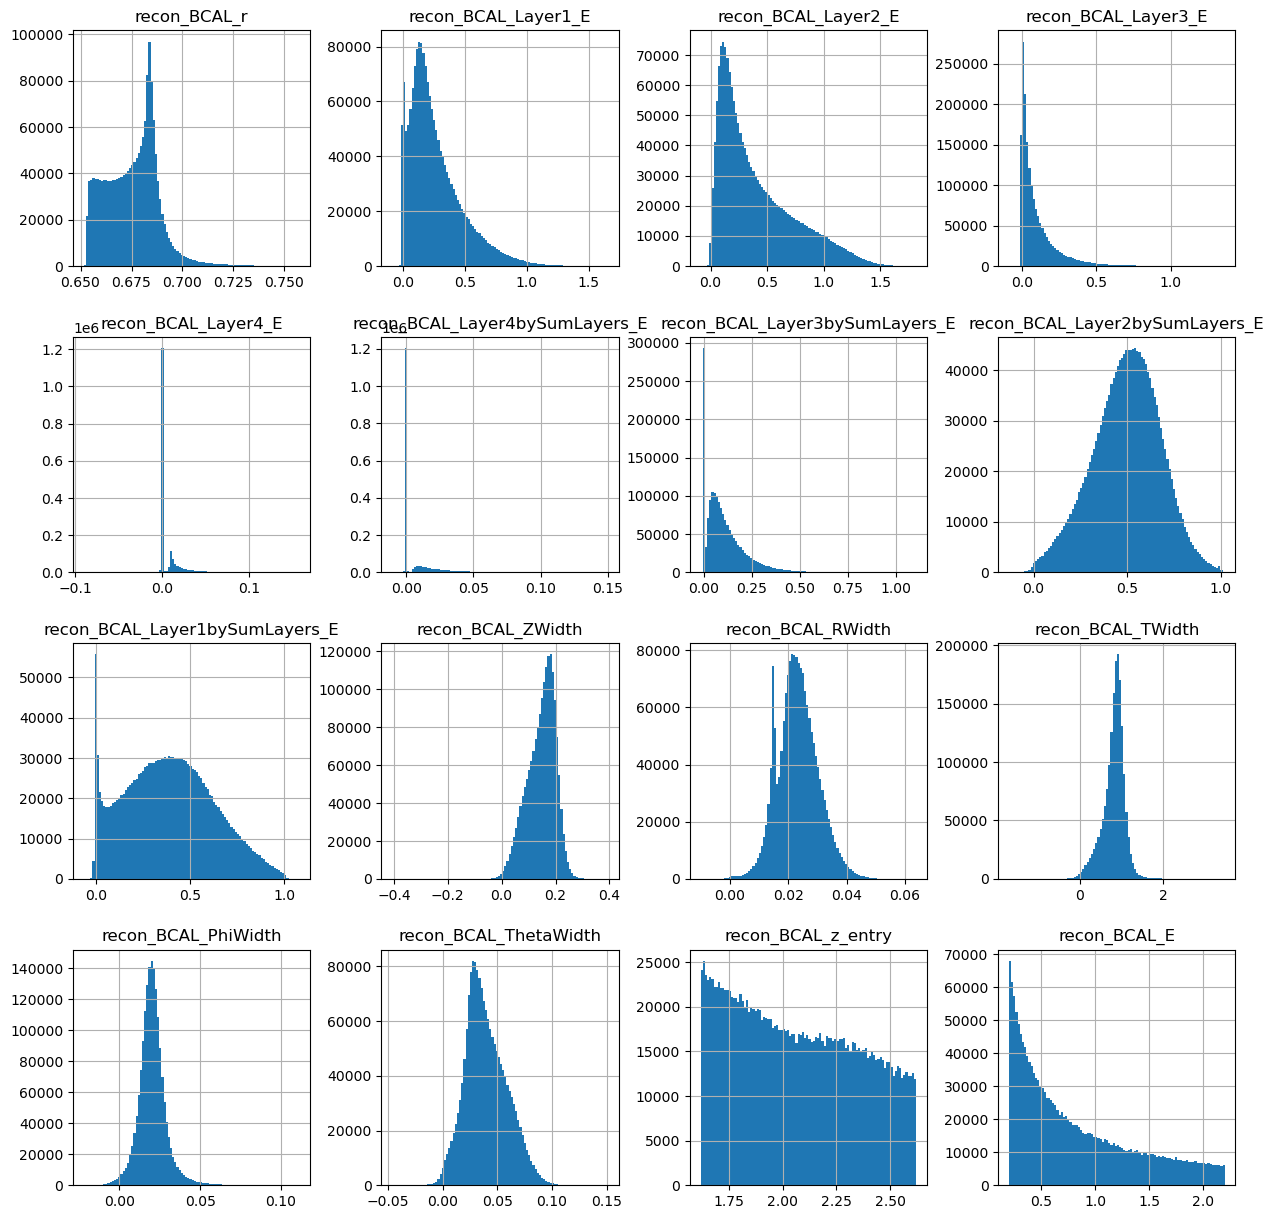

In [97]:
generated_dataframe = pd.DataFrame(generations,columns=photons.columns[2:])
generated_dataframe['recon_BCAL_z_entry'] = conditions[:,0]
generated_dataframe['recon_BCAL_E'] = conditions[:,1]

generated_dataframe.hist(bins=100,figsize=(15,15))

array([[<AxesSubplot:title={'center':'recon_BCAL_r'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer1_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer2_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer3_E'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_Layer4_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer4bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer3bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_Layer2bySumLayers_E'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_Layer1bySumLayers_E'}>,
        <AxesSubplot:title={'center':'recon_BCAL_ZWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_RWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_TWidth'}>],
       [<AxesSubplot:title={'center':'recon_BCAL_PhiWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_ThetaWidth'}>,
        <AxesSubplot:title={'center':'recon_BCAL_z_entry'}>,
        <AxesSubplot:title={'center

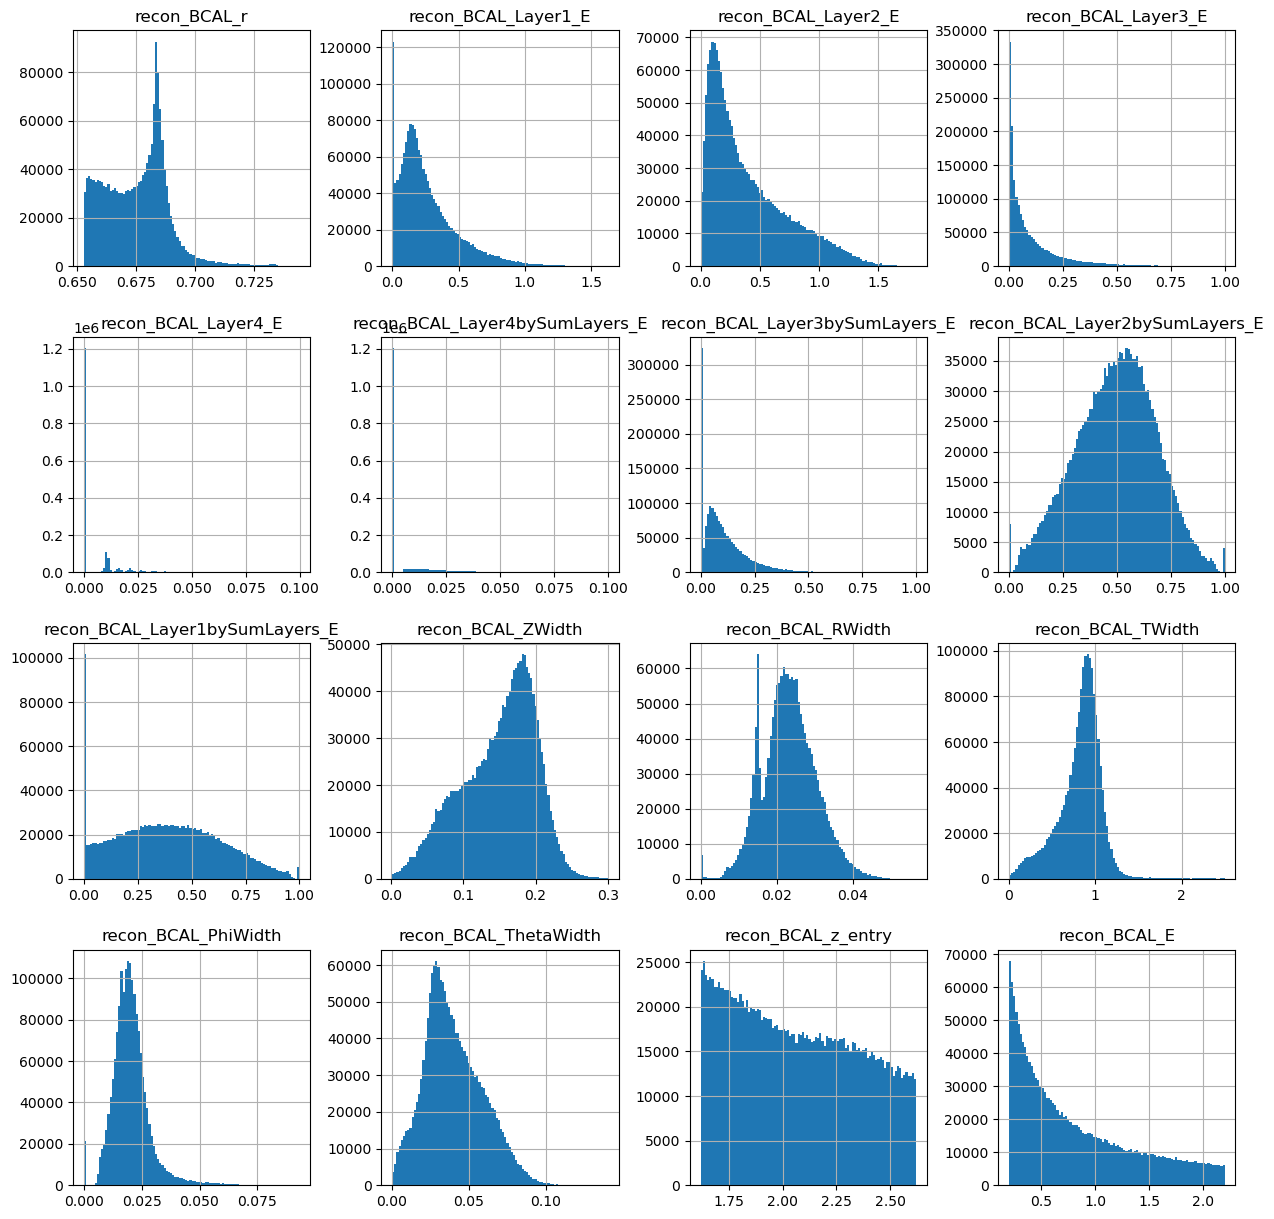

In [102]:
photons[generated_dataframe.columns].hist(figsize=(15,15),bins=100)

Looks ok. Lets make the same plots as we did from the true datasets.

Generated Photons


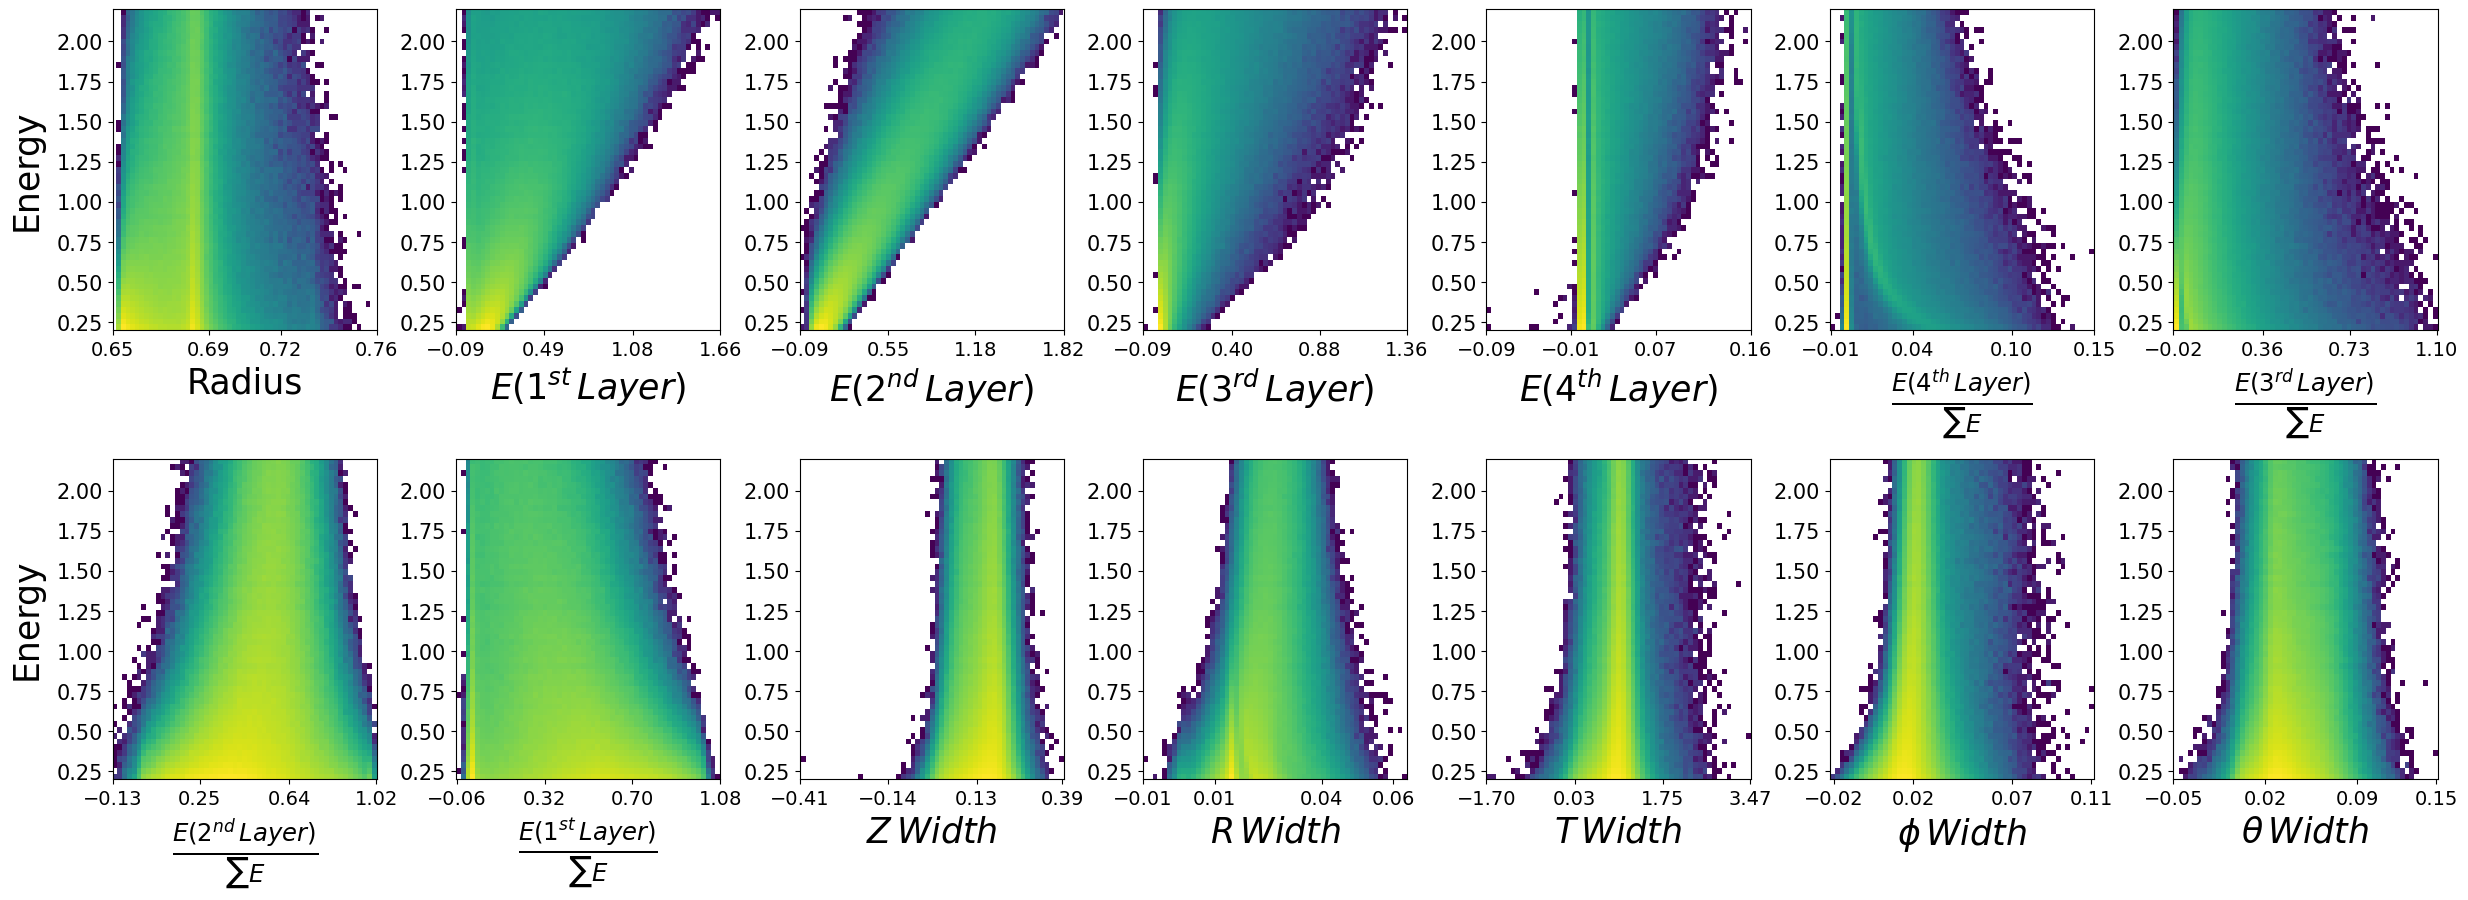

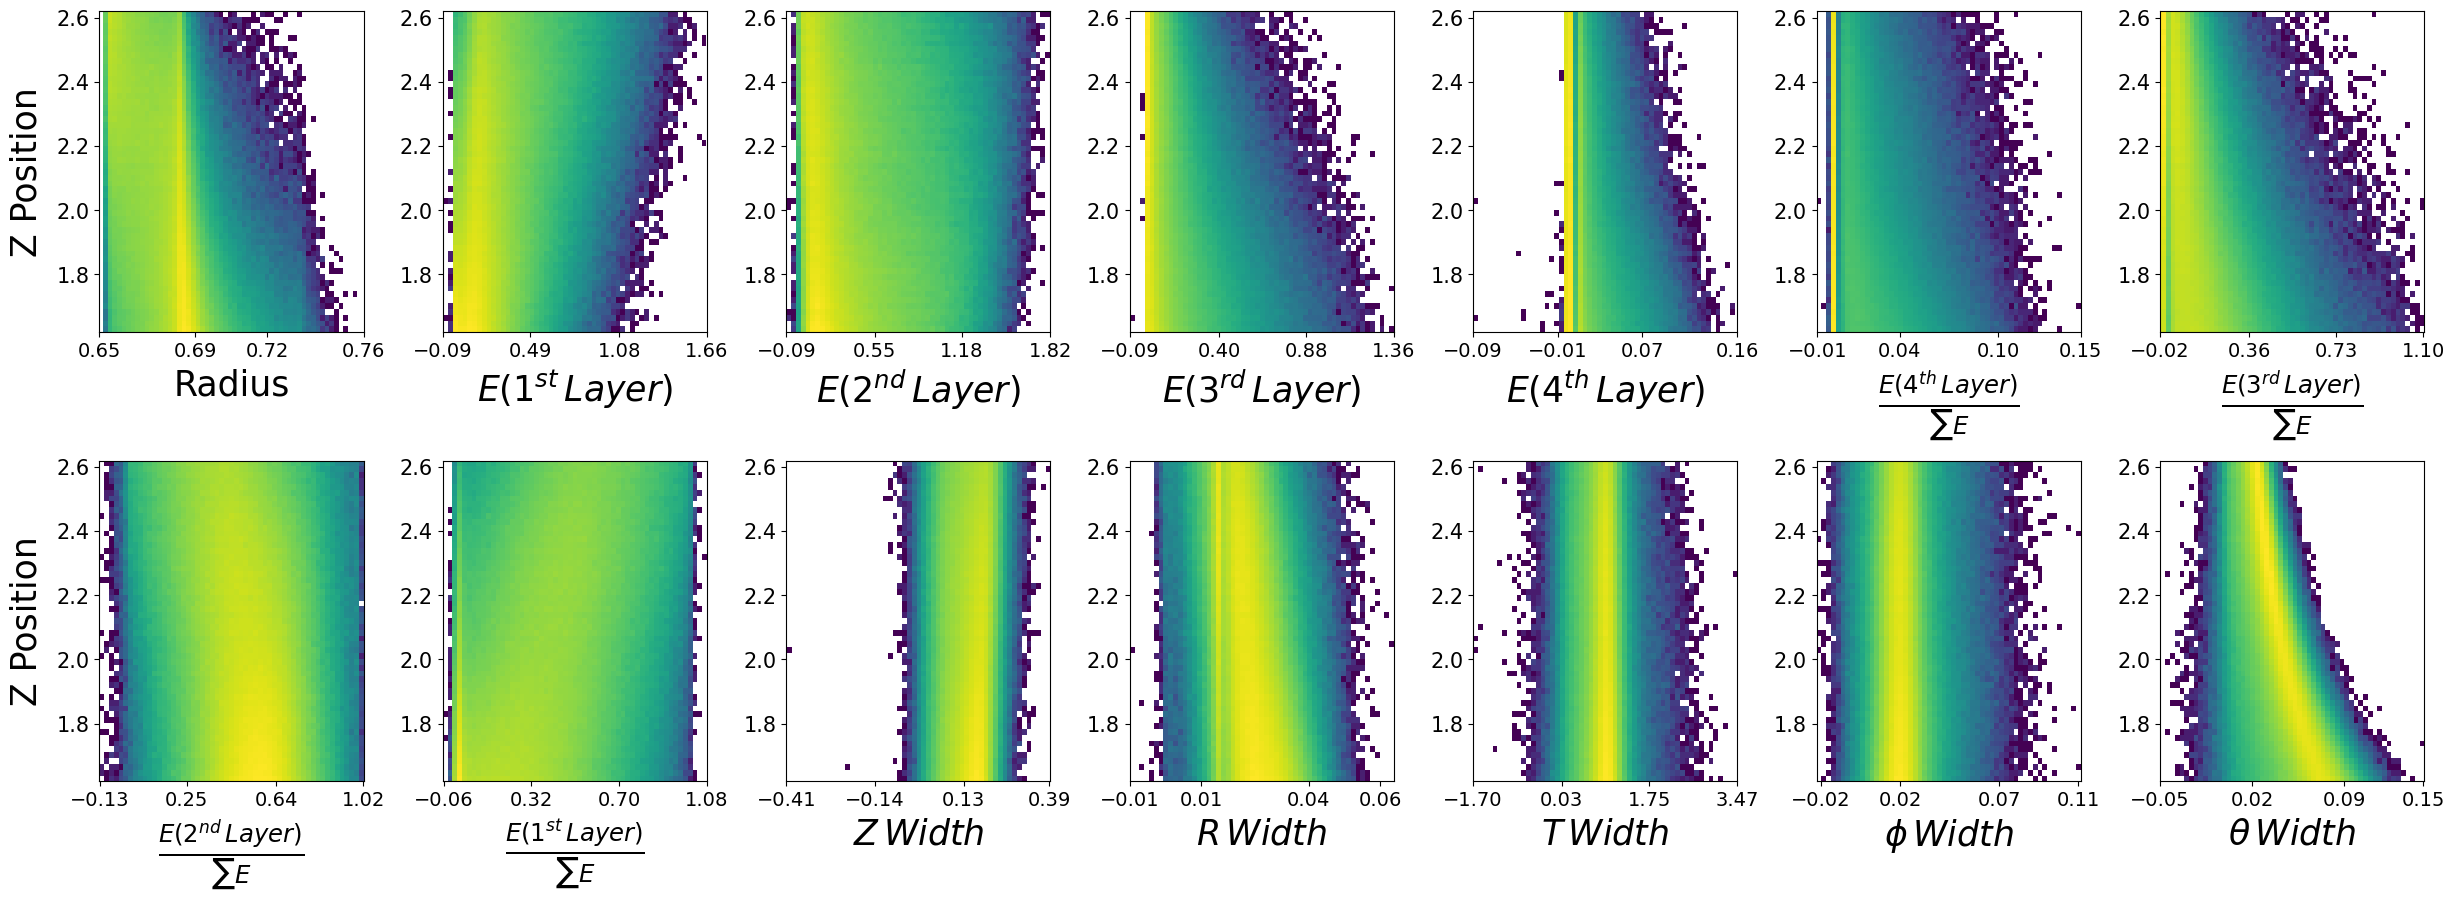

In [103]:
make_plots(generated_dataframe,"Generated Photons")

True Photons


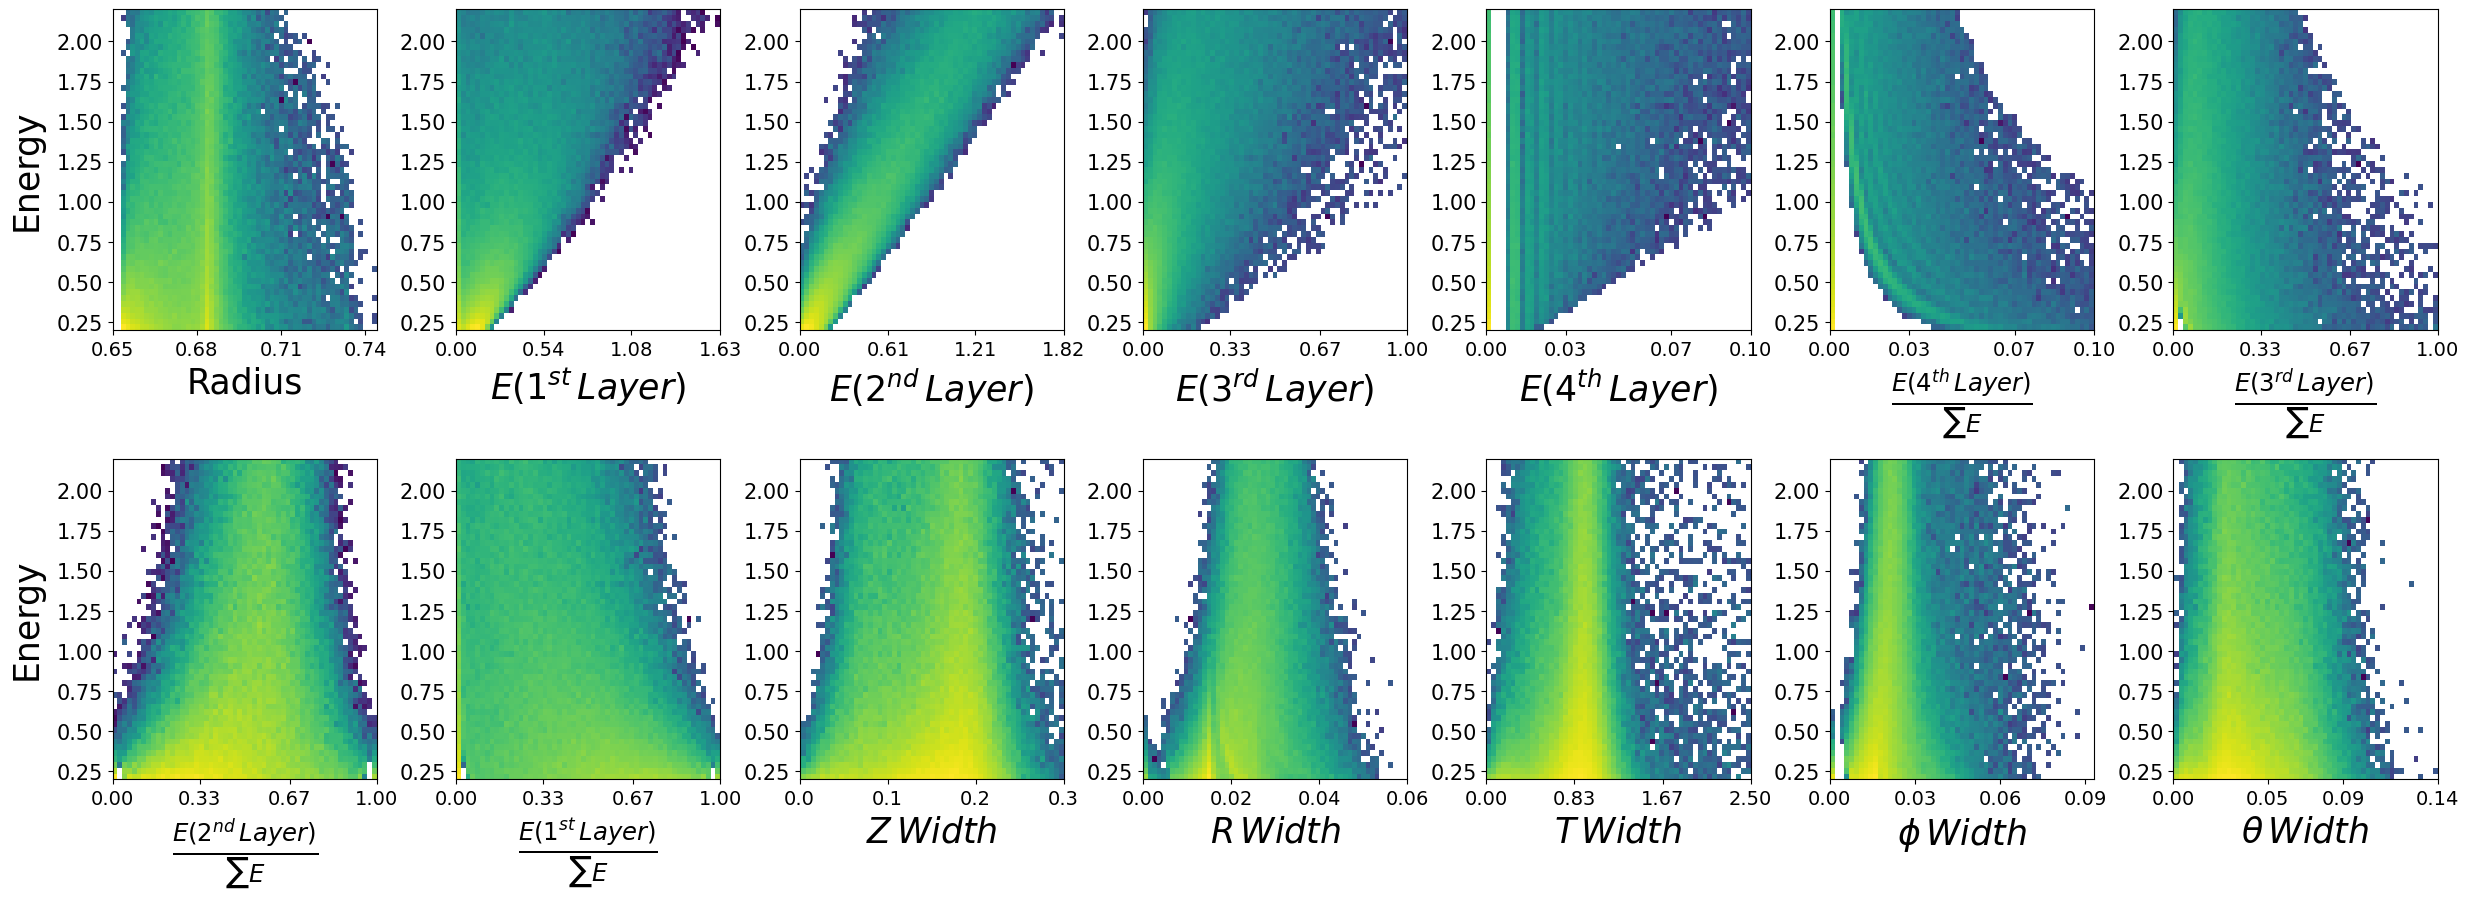

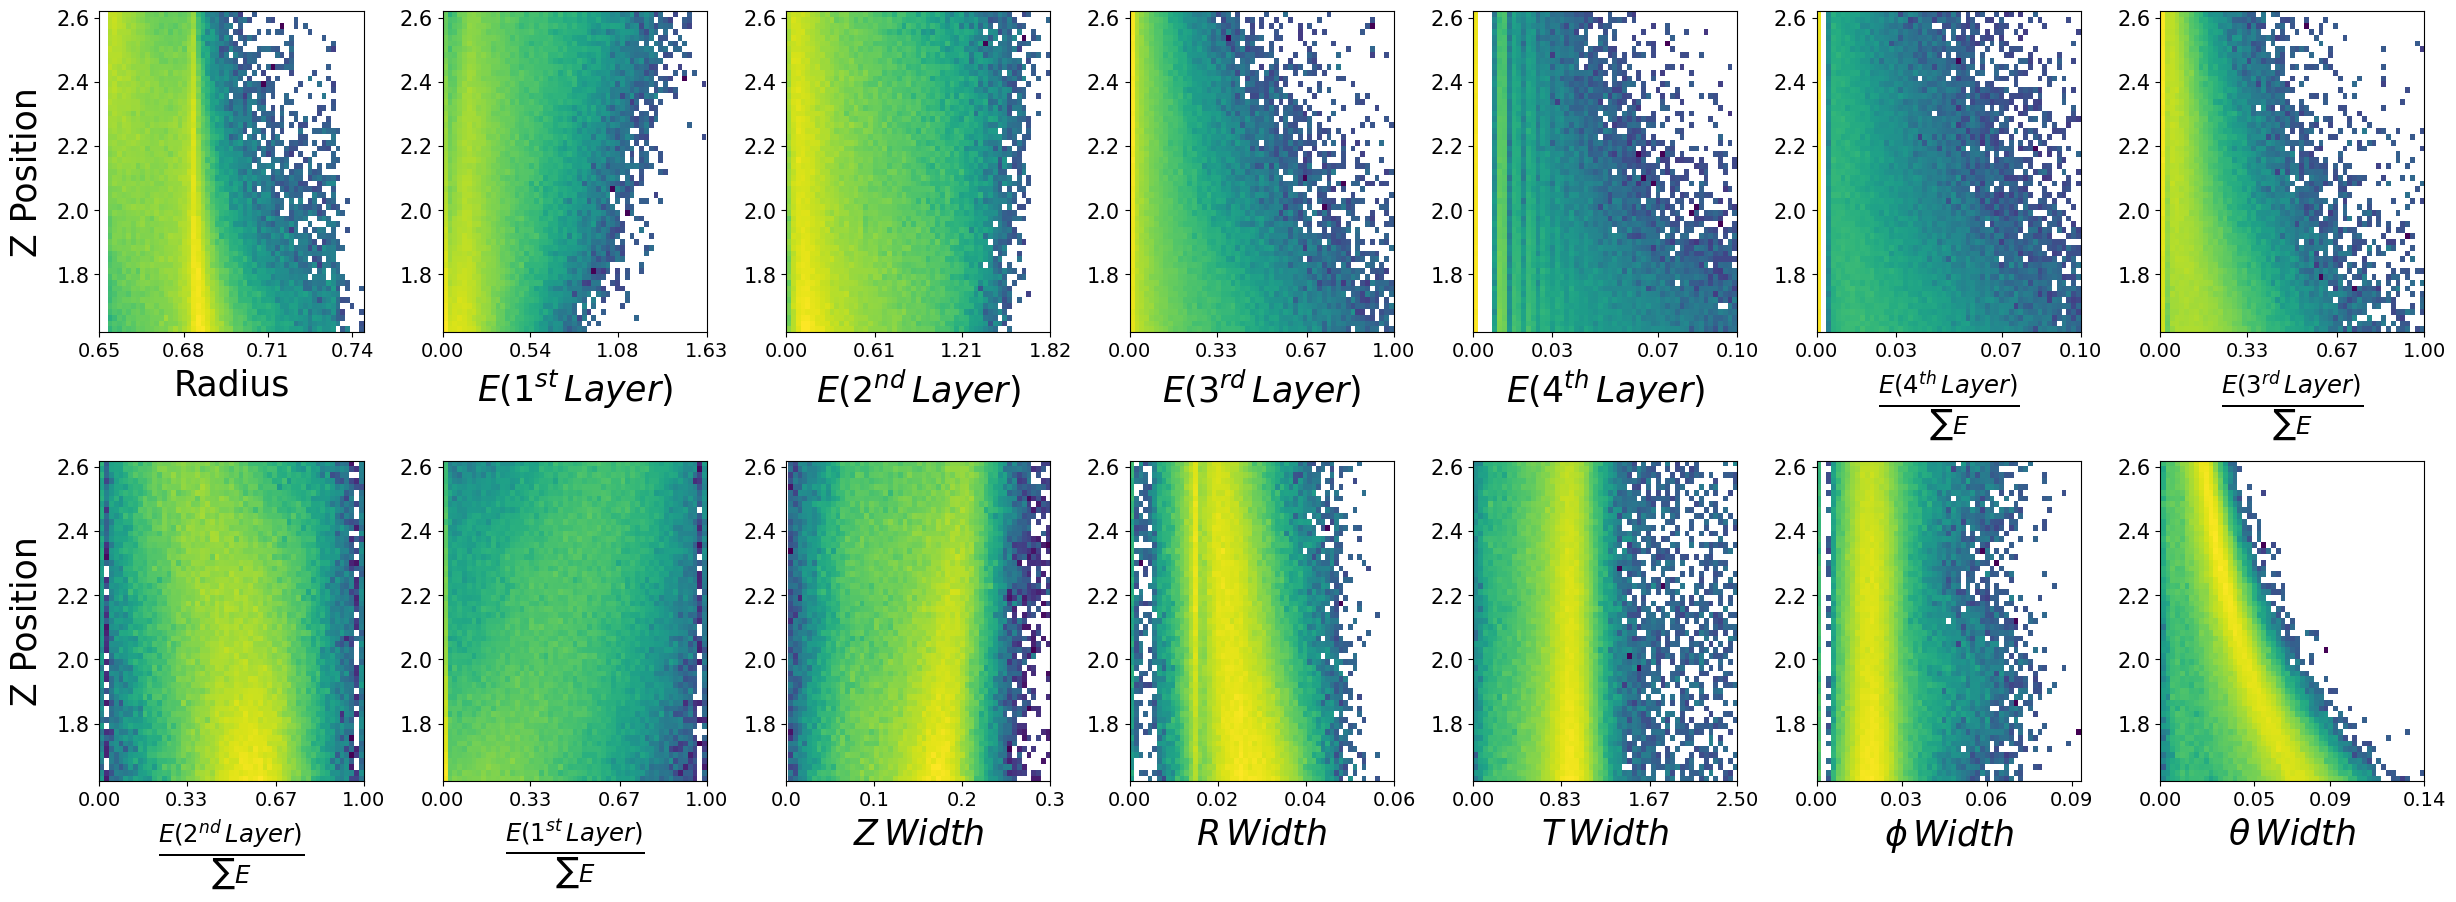

In [104]:
make_plots(photons,"True Photons")

Not bad! Do you notice some things that are potentially wrong with the dataset we have generated? For example, what are the physical bounds of some of these features? This is something to think about with generative models in physics. In most cases, it is not enough to simply just generate data. One must come up with a scheme to ensure all samples generated are physical!


Can you think of ways to do this?

### Your turn.

Now I want you to utlize the code we have developed together above to recreate a model that works on neutrons. You can make any changes you want to hyperparameters, but keep in mind training times as network complexity grows.

This is your individual copy of the notebook, so feel free to work directly below this cell, or you can make a copy.

Things I want you to think about:

1. Once you have trained your model, look at the generations and see how they compare.
2. Are any of the generations unphysical? Can you come up with a strategy to deal with this? This can be as simple or complicated as you like.

Any issues or questions please let me know!